In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
correlations = df.corr()['quality'].drop('quality')
correlations

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [8]:
import seaborn as sn

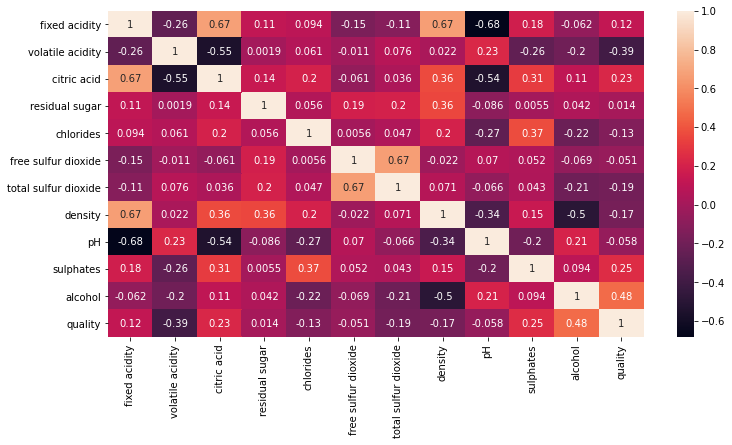

In [9]:
plt.figure(figsize=(12, 6))
sn.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [11]:
features = get_features(0.05)
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [12]:
x = df[features]
y = df['quality']

In [13]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

x_train1 = sc.fit_transform(x_train)
x_test1 = sc.fit_transform(x_test)

In [19]:
x_train1.shape,  x_test1.shape, y_train.shape, y_test.shape

((1199, 10), (400, 10), (1199,), (400,))

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression    

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train1, y_train)

LinearRegression()

In [23]:
model.coef_

array([ 0.03093242, -0.17894045, -0.02726573, -0.07186542,  0.05839023,
       -0.11572044,  0.00143562, -0.06778903,  0.13619669,  0.31993182])

In [24]:
model.intercept_

5.638865721434529

In [25]:
y_pred = model.predict(x_test1)

In [26]:
y_pred

array([5.1688615 , 5.68331084, 5.91499434, 6.15021756, 5.03705667,
       5.47104221, 5.07302576, 6.16862696, 5.55224091, 5.78540015,
       5.65430524, 5.26388332, 5.26445481, 5.35274801, 6.48428665,
       5.06863503, 5.87373792, 5.23188265, 6.09738777, 6.36314697,
       6.43714845, 5.53359354, 5.81065762, 5.0299154 , 5.25540796,
       5.50843739, 5.17536652, 6.62778687, 5.91653105, 5.76069631,
       6.11929501, 6.31046217, 4.93758855, 5.90513605, 5.18775167,
       5.97512918, 6.80581561, 5.07470722, 5.28695512, 5.90513605,
       5.17949523, 4.87606008, 6.50447234, 5.42808353, 5.34748423,
       5.87446777, 5.72850444, 5.27295655, 5.27901943, 5.48962404,
       5.1126589 , 5.63967873, 6.02489757, 6.34970619, 5.5013926 ,
       5.38287368, 5.12123946, 4.95662119, 5.23078479, 5.12266179,
       4.8336167 , 5.46914493, 5.28999987, 5.71634438, 5.85863872,
       6.5513741 , 5.41379941, 5.74374276, 5.20242409, 6.0145485 ,
       5.67828664, 5.63541274, 5.77951952, 5.25185455, 6.00368

In [27]:
y_pred1 = np.round(y_pred)

In [28]:
y_pred1

array([5., 6., 6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6.,
       5., 6., 6., 6., 6., 6., 5., 5., 6., 5., 7., 6., 6., 6., 6., 5., 6.,
       5., 6., 7., 5., 5., 6., 5., 5., 7., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 7., 5., 6.,
       5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 6., 6., 5., 5., 6., 6.,
       5., 5., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5., 5., 5., 7., 6., 6.,
       6., 6., 6., 5., 5., 5., 5., 6., 6., 6., 6., 6., 5., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 6., 5., 5., 5., 6., 6., 7., 6.,
       6., 6., 5., 5., 6., 7., 5., 5., 6., 5., 6., 6., 7., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 5., 5., 6.,
       6., 7., 5., 6., 6., 5., 6., 6., 5., 6., 7., 5., 6., 6., 6., 6., 6.,
       5., 6., 6., 6., 7., 5., 5., 5., 5., 6., 6., 6., 5., 5., 5., 6., 6.,
       5., 6., 5., 6., 5., 6., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5.,
       5., 6., 5., 6., 5.

In [29]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [30]:
mean_absolute_error(y_test, y_pred1)

0.4175

In [31]:
accuracy_score(y_test, y_pred1) * 100

61.0

In [32]:
prediction = np.round(model.predict([[7.2, 0.7, 0.00, 0.72, 17.0, 38.0, 0.99, 3.51, 0.60, 9.7]]))
prediction

array([5.])

In [33]:
output_df = pd.DataFrame({'pred_quality' : y_pred1})

In [34]:
output_df.to_csv('quality-prediction.csv', index=False)

In [35]:
pd.read_csv('quality-prediction.csv')

,pred_quality
0,5.0
1,6.0
2,6.0
3,6.0
4,5.0
...,...
395,5.0
396,6.0
397,5.0
398,6.0
